In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
# from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression,Lasso
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("D:\practice_data_set\stock_data.csv")
df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0


In [3]:
df.shape

(972, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       972 non-null    object 
 1   Ticker     972 non-null    object 
 2   Adj Close  972 non-null    float64
 3   Close      972 non-null    float64
 4   High       972 non-null    float64
 5   Low        972 non-null    float64
 6   Open       972 non-null    float64
 7   Volume     972 non-null    float64
dtypes: float64(6), object(2)
memory usage: 60.9+ KB


In [5]:
df.isnull().sum()

Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [6]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,972.000000,972.000000,972.000000,972.000000,972.000000,9.720000e+02
mean,2331.144987,2348.198490,2367.756148,2328.416296,2347.487891,9.199730e+06
std,922.665514,927.894765,936.526731,919.210077,927.290255,9.897821e+06
min,1304.812012,1329.150024,1341.900024,1305.000000,1320.199951,7.722910e+05
25%,1487.235016,1501.674988,1517.037506,1489.187500,1504.074982,3.371086e+06
50%,1973.128723,1977.974976,2007.750000,1967.050049,1984.500000,5.846881e+06
75%,3149.300598,3163.075012,3193.787476,3109.062561,3116.775024,1.185393e+07
max,4188.805176,4219.250000,4254.750000,4177.000000,4215.250000,8.670560e+07


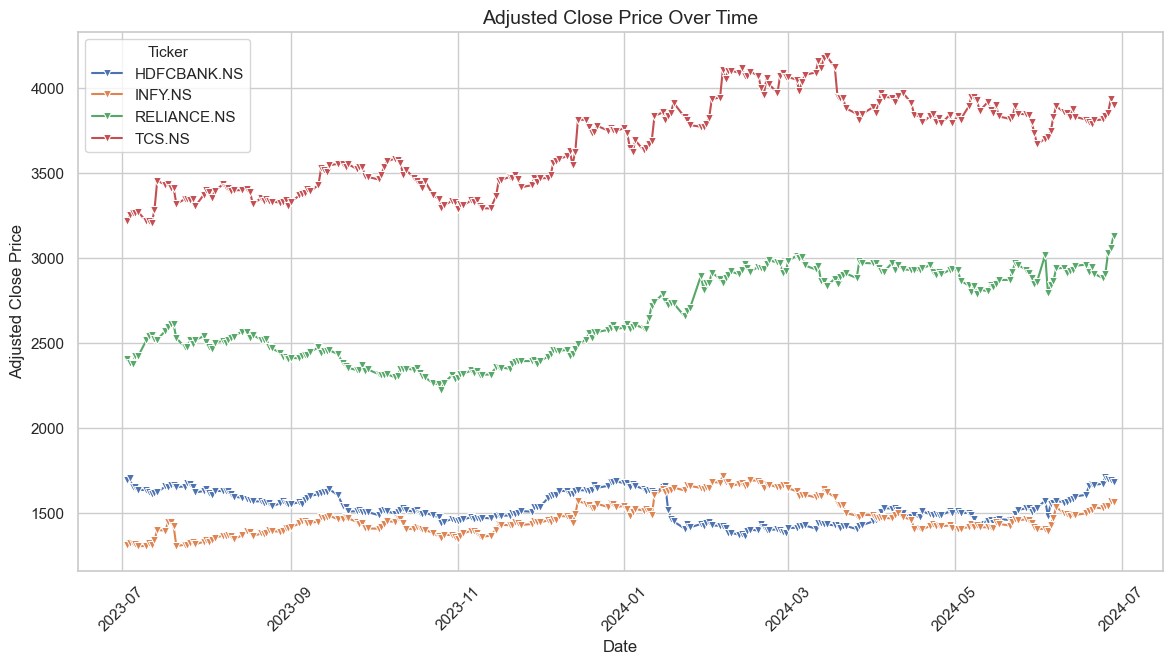

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
df.reset_index(inplace=True)
plt.figure(figsize=(14,7))
sns.set(style="whitegrid")
sns.lineplot(data=df,x='Date',y='Adj Close', hue="Ticker", marker="v")
plt.title("Adjusted Close Price Over Time",fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend(title='Ticker', title_fontsize='11',fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

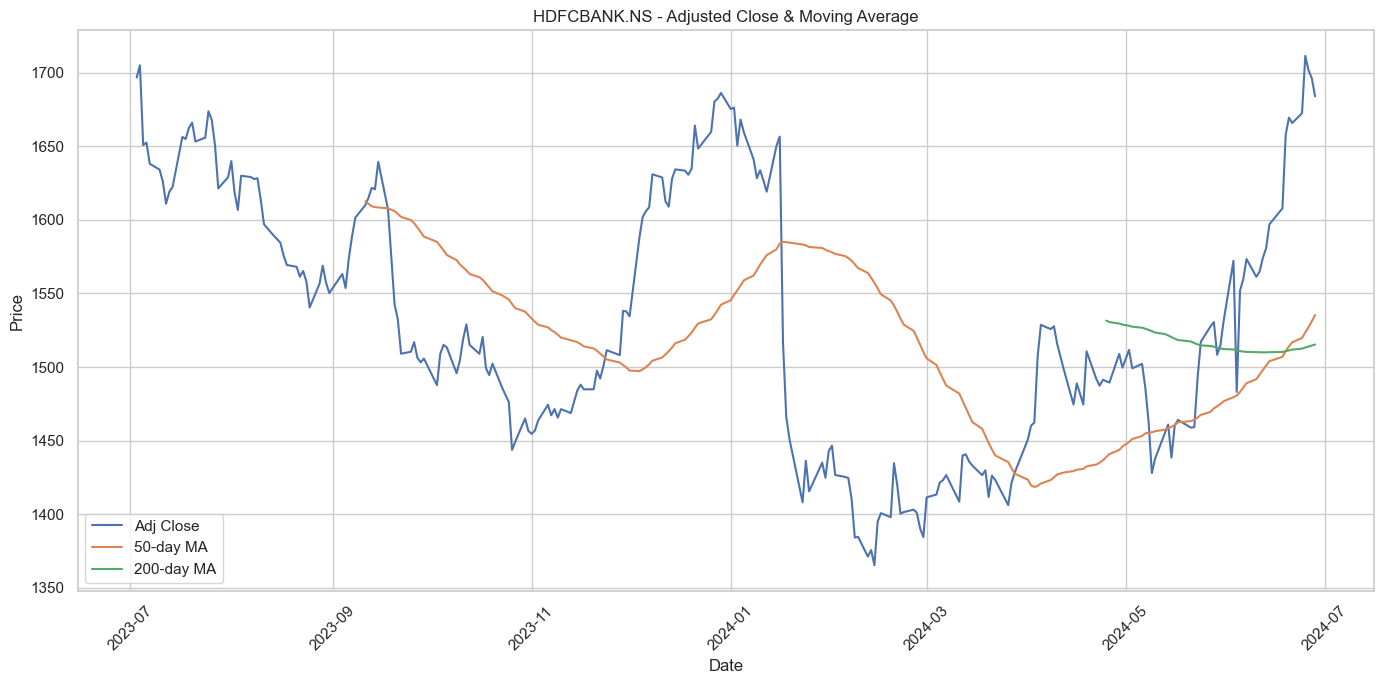

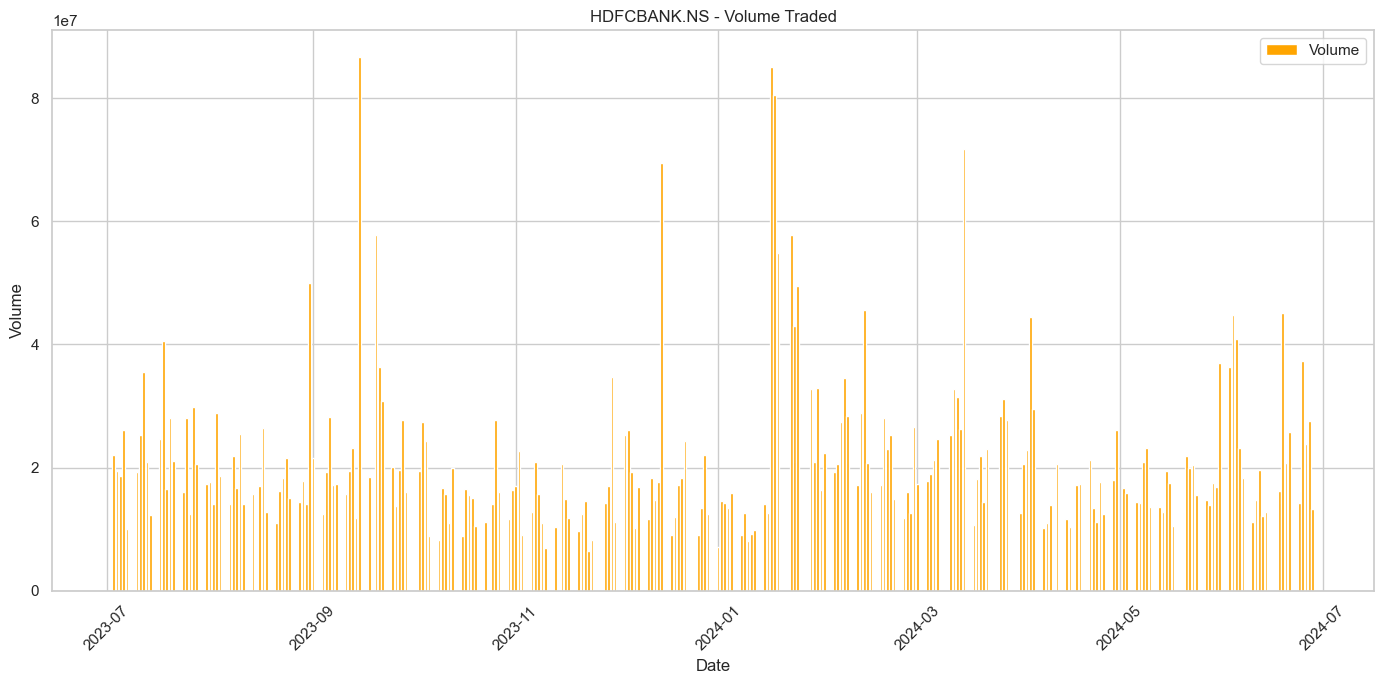

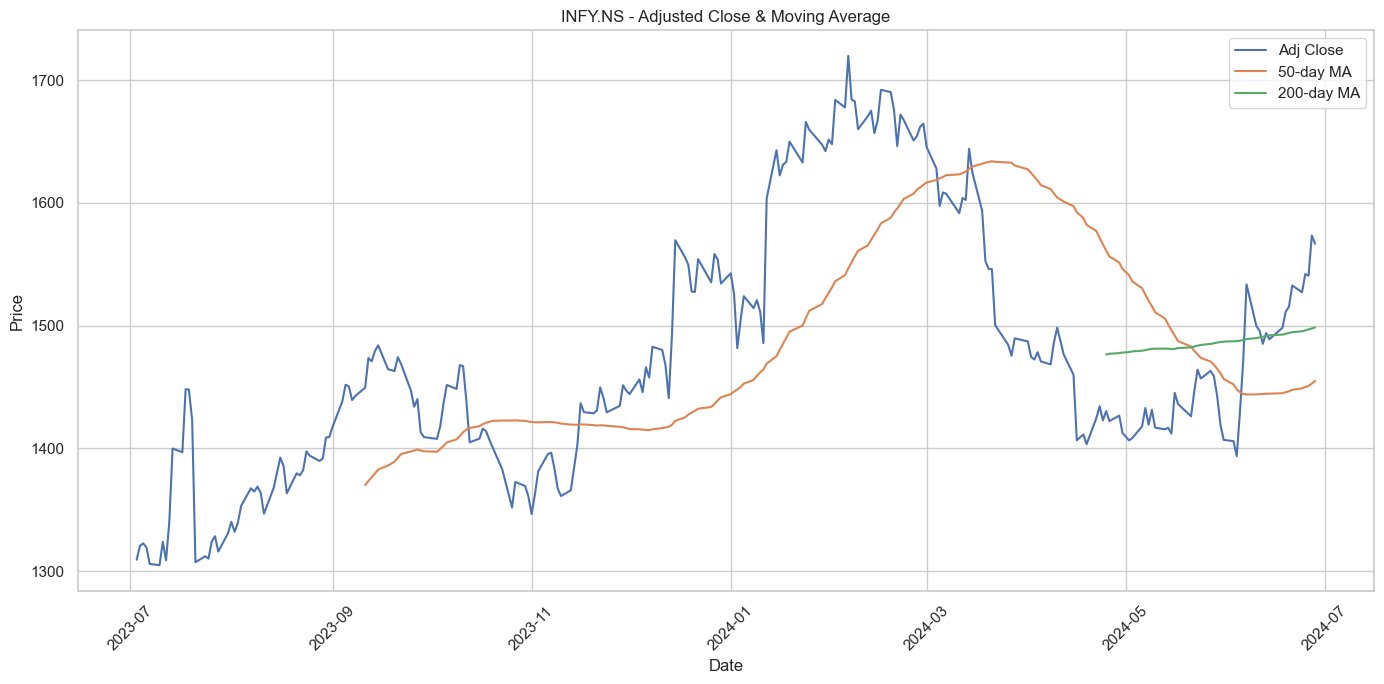

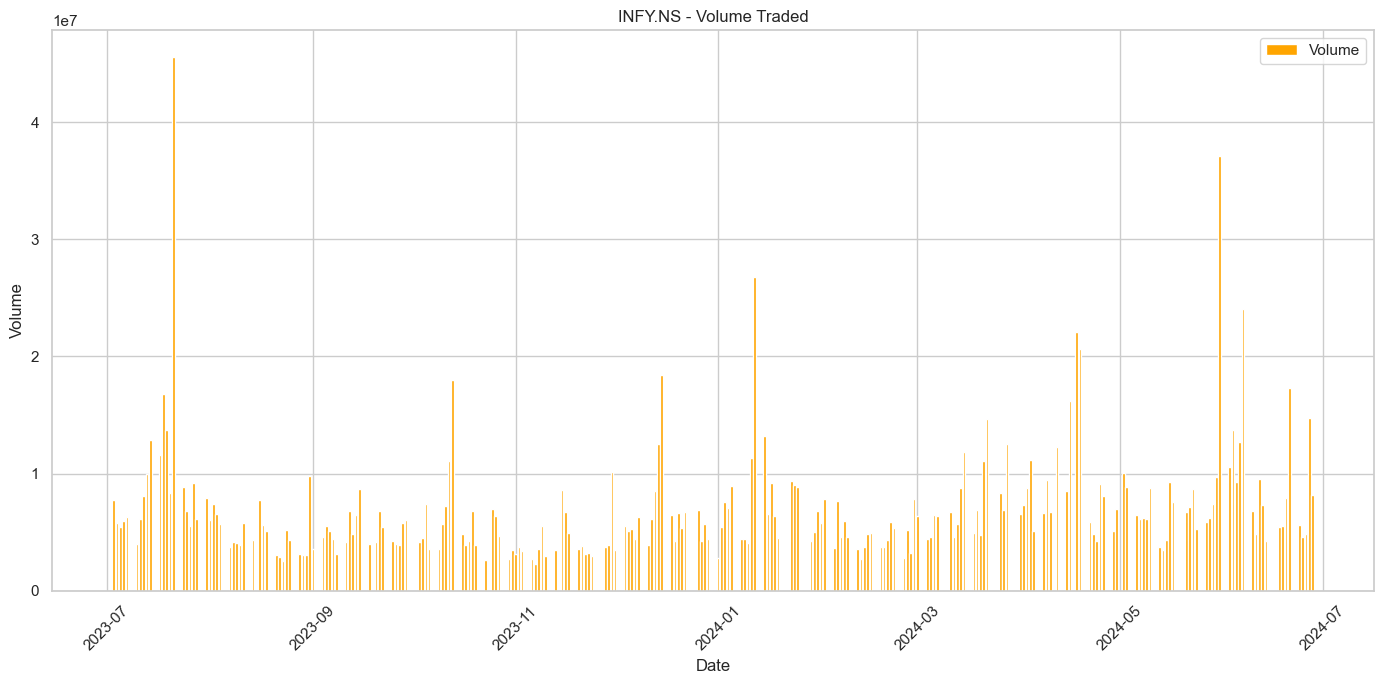

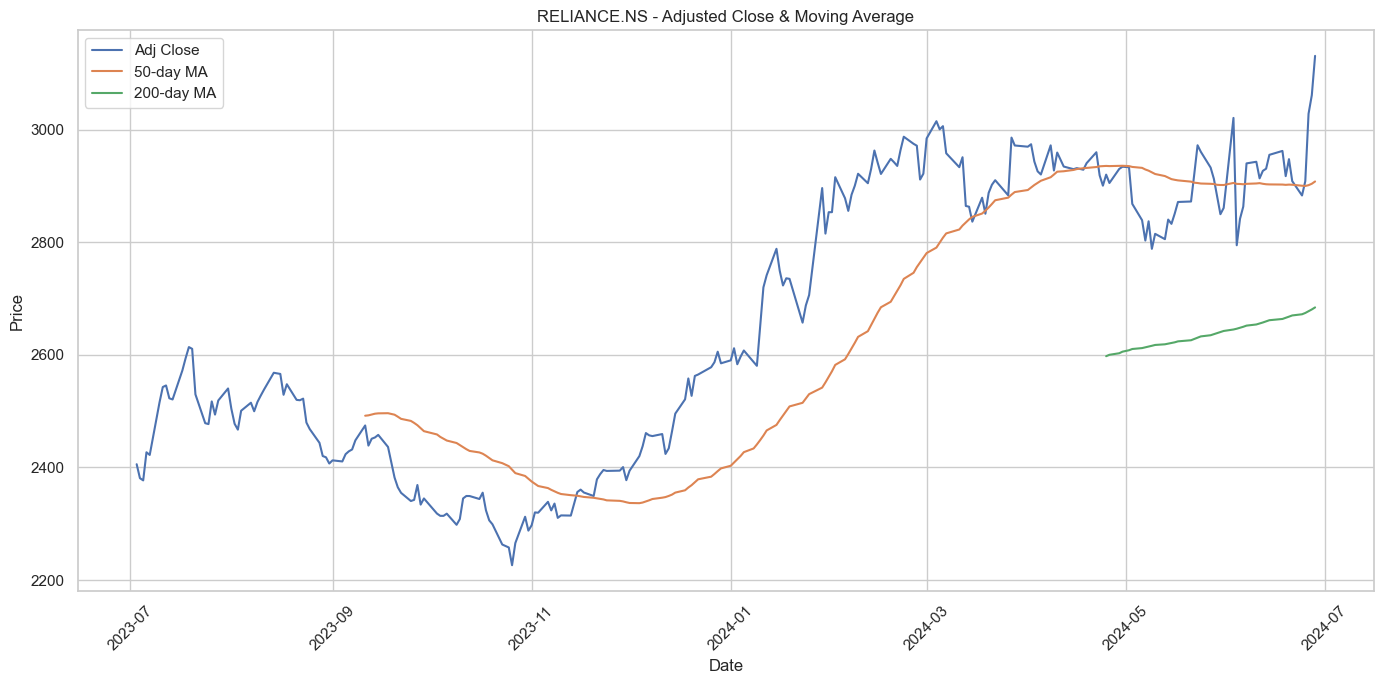

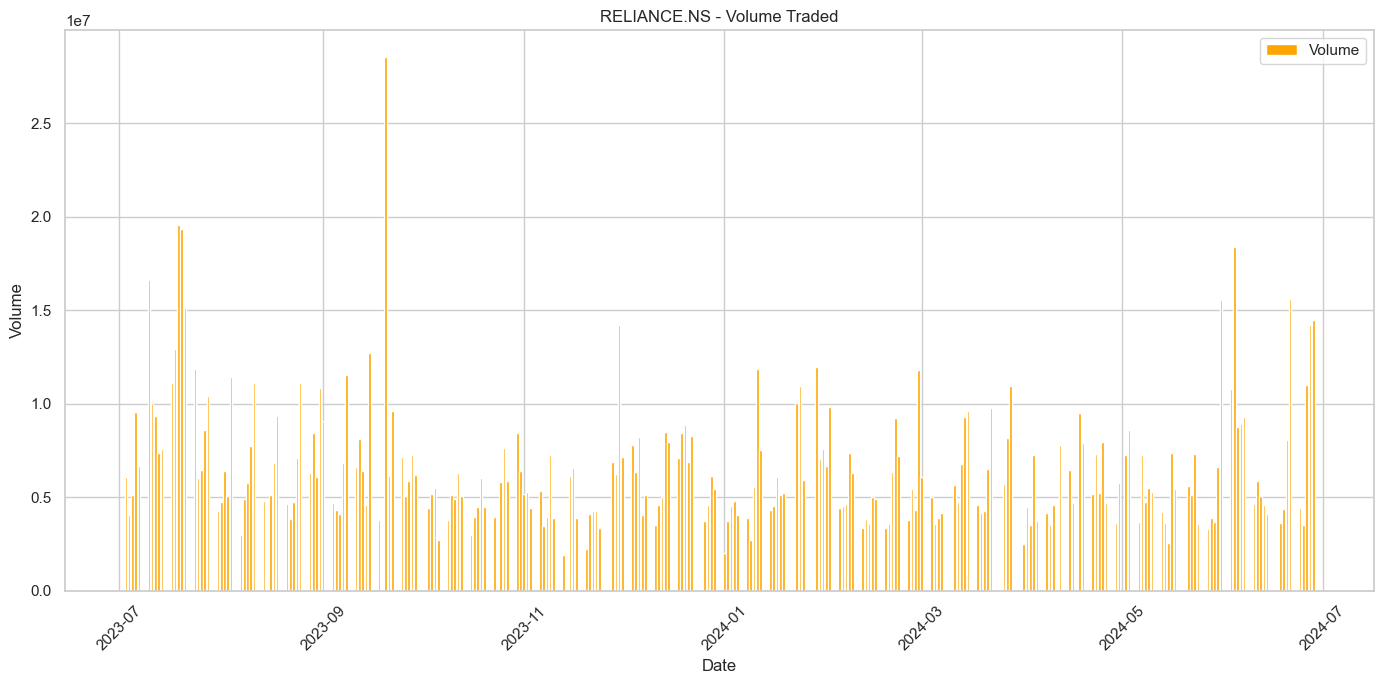

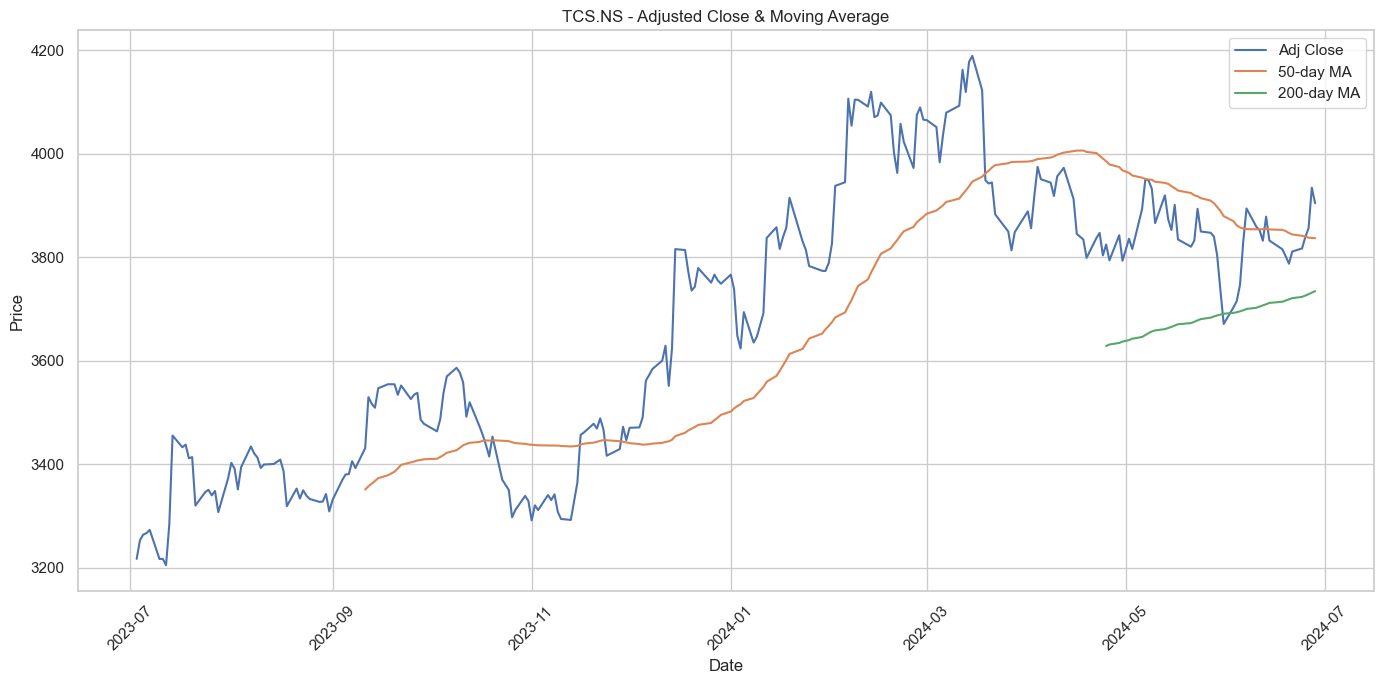

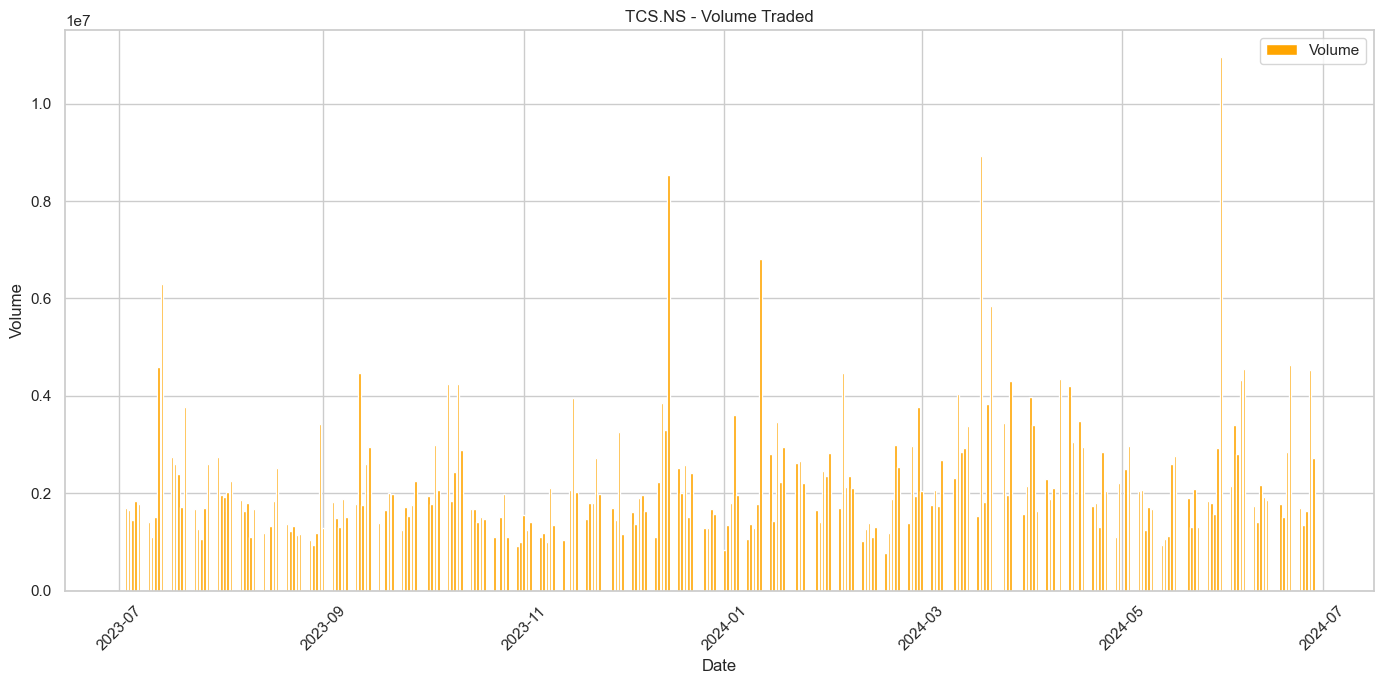

In [8]:
short_window = 50
long_window = 200
df.set_index('Date',inplace=True)
unique_tickers = df['Ticker'].unique()
for ticker in unique_tickers:
    ticker_data = df[df['Ticker']==ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
 
    plt.figure(figsize=(14,7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label="50-day MA")
    plt.plot(ticker_data.index,ticker_data['200_MA'], label="200-day MA")
    plt.title(f'{ticker} - Adjusted Close & Moving Average')
    plt.xlabel('Date')
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14,7))
    plt.bar(ticker_data.index, ticker_data['Volume'],label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

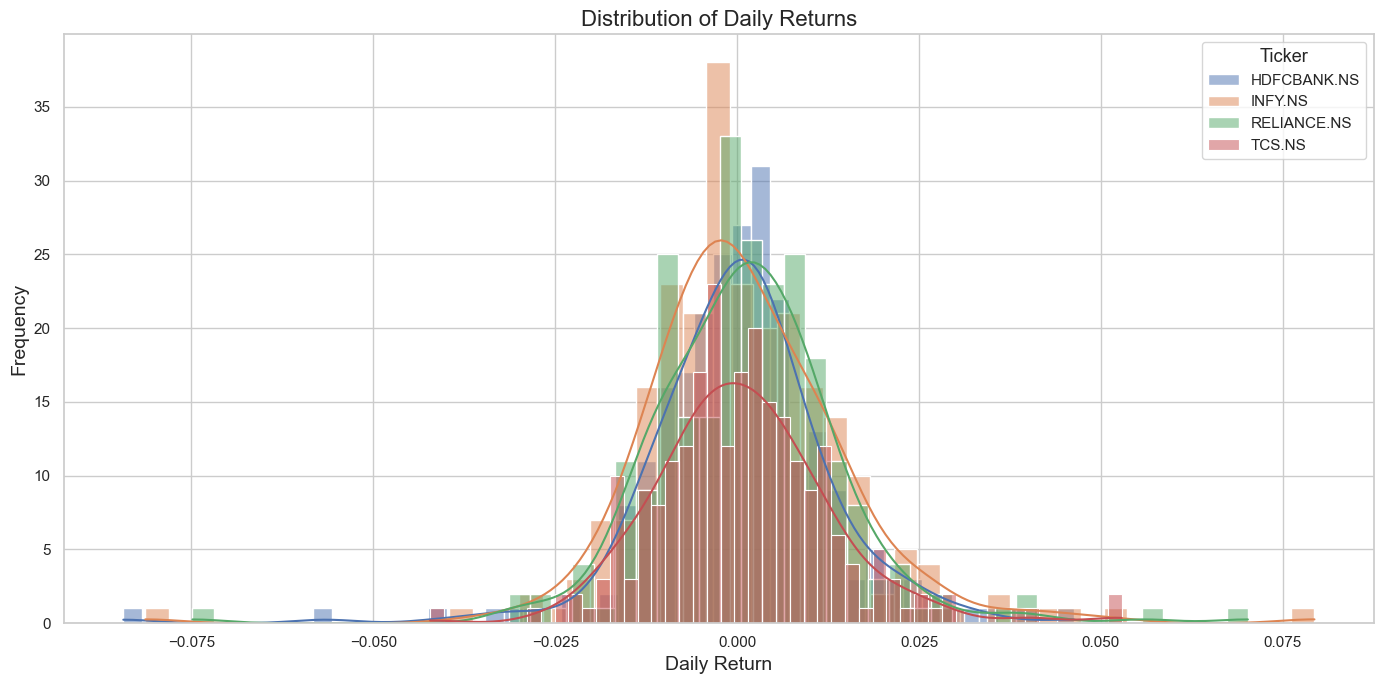

In [9]:
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14,7))
sns.set(style="whitegrid")
for ticker in unique_tickers:
    ticker_data = df[df['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

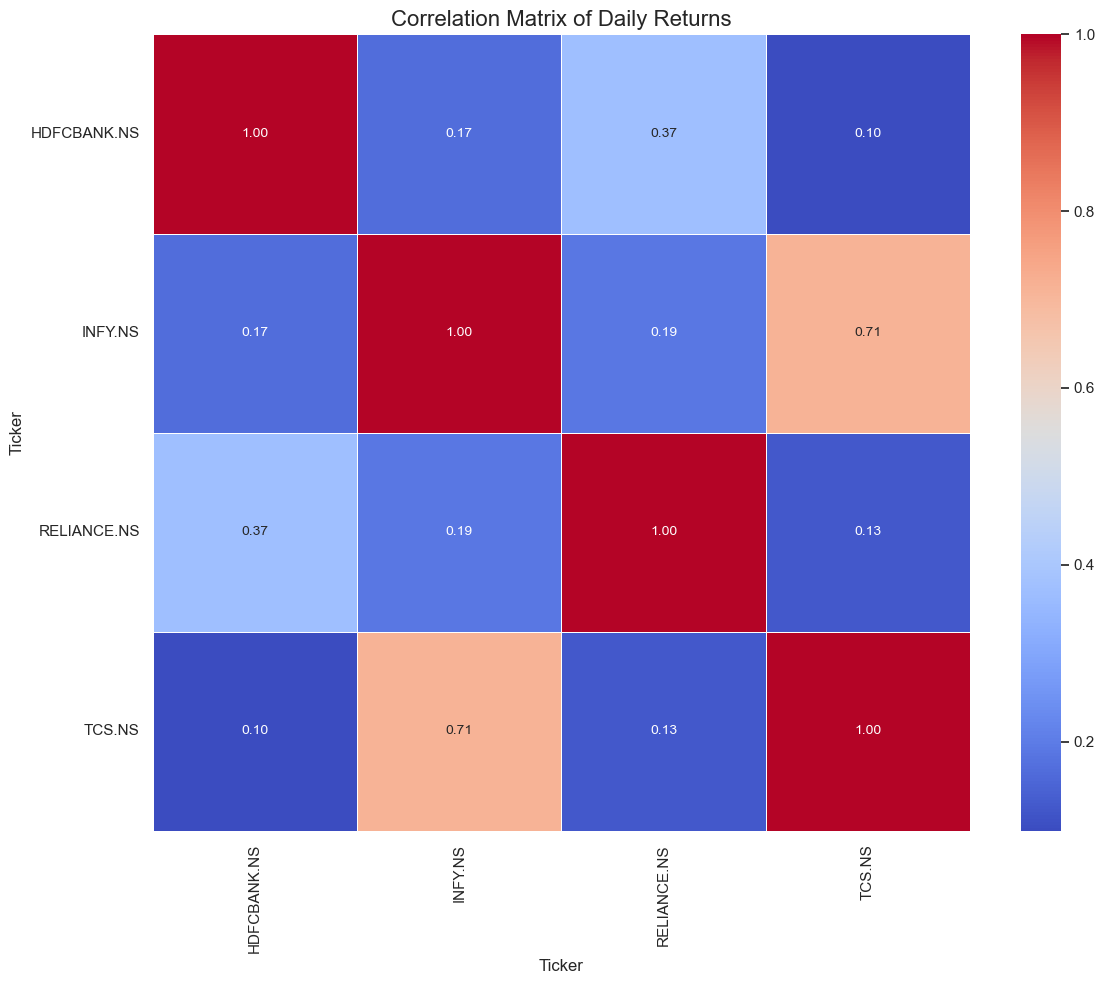

In [10]:
daily_returns = df.pivot_table(index='Date', columns="Ticker", values="Daily Return")
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5, fmt='.2f',
           annot_kws={"size":10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Portfolio Optimization

In [11]:
expected_returns = daily_returns.mean()*252  # annualize the return
volatility = daily_returns.std()*np.sqrt(252)
stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility' : volatility
})
stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.013661,0.206910
INFY.NS,0.213798,0.232261
RELIANCE.NS,0.297343,0.214664
TCS.NS,0.220852,0.196869


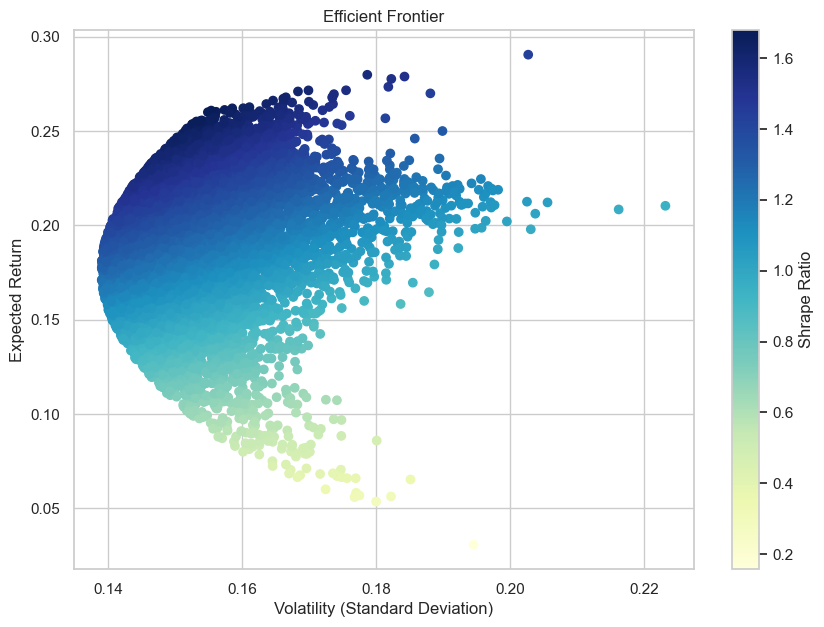

In [27]:
# function to calculate portfolio performance 
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility
# number of portfolios to simulate
num_portfolios = 10000
# arrays to store the results
results = np.zeros((3,num_portfolios))

# annualized covariance matrix 
cov_matrix = daily_returns.cov() * 252
np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfilio_returns, portfilio_volatility = portfolio_performance(weights, expected_returns,cov_matrix)
    results[0,i] = portfilio_returns
    results[1,i] = portfilio_volatility
    results[2,i] = portfilio_returns / portfilio_volatility    # Shrape Ratio
plt.figure(figsize=(10,7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Expected Return")
plt.colorbar(label="Shrape Ratio")
plt.grid(True)
plt.show()

In [29]:
max_shrape_idx = np.argmax(results[2])
max_shrape_return = results[0,max_shrape_idx]
max_shrape_volatility = results[1, max_shrape_idx]
max_shrape_ratio = results[2, max_shrape_idx]
max_shrape_return, max_shrape_volatility, max_shrape_ratio

(0.26076539462645376, 0.1553541983719753, 1.6785217094814853)

In [32]:
max_shrape_weights = np.zeros(len(unique_tickers))
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    
    if results[2,i] == max_shrape_ratio:
        max_shrape_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    "Weights" : max_shrape_weights
})

portfolio_weights_df

,Ticker,Weights
0,HDFCBANK.NS,0.319819
1,INFY.NS,0.136760
2,RELIANCE.NS,0.353290
3,TCS.NS,0.190131


# Summary